In [40]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [41]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa1.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [42]:
appa_hours.dtypes

Time                 datetime64[ns]
ZnOR_1                      float64
ZnOR_2                      float64
LaFeO3_1                    float64
LaFeO3_2                    float64
WO3_1                       float64
WO3_2                       float64
ZnOR_1_heatR                float64
ZnOR_2_heatR                float64
LaFeO3_1_heatR              float64
LaFeO3_2_heatR              float64
WO3_1_heatR                 float64
WO3_2_heatR                 float64
ZnOR_1_heatV                float64
ZnOR_2_heatV                float64
LaFeO3_1_heatV              float64
LaFeO3_2_heatV              float64
WO3_1_heatV                 float64
WO3_2_heatV                 float64
Temperature                 float64
Relative_Humidity           float64
Pressure                    float64
VOC                         float64
ZnOR_1_Age                  float64
ZnOR_2_Age                  float64
LaFeO3_1_Age                float64
LaFeO3_2_Age                float64
WO3_1_Age                   

In [43]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2',
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2',
    'ZnOR_1_heatR', 'ZnOR_2_heatR',
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'WO3_1_heatR', 'WO3_2_heatR',
    'ZnOR_1_heatV', 'ZnOR_2_heatV',
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV',
    'WO3_1_heatV', 'WO3_2_heatV',
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age',
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'WO3_1_Age', 'WO3_2_Age',
    'sin_month', 'cos_month',
    'UV', 'Wind_Speed',
    'NO2', 'SO2', 'O3', 'CO'
]]

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [45]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2',
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2',
    'ZnOR_1_heatR', 'ZnOR_2_heatR',
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'WO3_1_heatR', 'WO3_2_heatR',
    'ZnOR_1_heatV', 'ZnOR_2_heatV',
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV',
    'WO3_1_heatV', 'WO3_2_heatV',
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age',
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'WO3_1_Age', 'WO3_2_Age',
    'sin_month', 'cos_month',
    'UV', 'Wind_Speed',
]

#Selecting the target
outs = ['NO2', 'O3', 'CO']

In [46]:
from sklearn.model_selection import train_test_split

#splitting the values in training and test
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=800-200, stop=800+200, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(70 - 5, 70 + 5, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [9, 10, 11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [600, 644, 688, 733, 777, 822, 866, 911, 955, 1000], 'max_features': ['sqrt'], 'max_depth': [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, None], 'min_samples_split': [9, 10, 11], 'min_samples_leaf': [2, 3], 'bootstrap': [True, False]}


In [31]:
# Choosing the type of model
model = RandomForestRegressor()

In [32]:
# Performing the RandomForestRegression with a Random Search on hyper-parameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  13.6s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  13.9s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.4s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.5s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.8s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.8s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [65, 66, 67, 68, 69, 70,
                                                      71, 72, 73, 74, 75,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [9, 10, 11],
                                        'n_estimators': [600, 644, 688, 733,
                                                         777, 822, 866, 911,
                                                         955, 1000]},
                   random_state=42, verbose=2)

In [33]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather1_complete(1).csv')

In [34]:
#Saving the model itself in a .sav file
import pickle

pickle.dump(rf_random, open('model_weather1_complete(1).sav', 'wb'))

In [47]:

rf_random = pickle.load(open("model_weather1_complete(1).sav", "rb"))
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [65, 66, 67, 68, 69, 70,
                                                      71, 72, 73, 74, 75,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [9, 10, 11],
                                        'n_estimators': [600, 644, 688, 733,
                                                         777, 822, 866, 911,
                                                         955, 1000]},
                   random_state=42, verbose=2)

## Results

In [35]:
#A method to print the performance of the model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f'Average Degrees Error:\n{np.mean(errors)}')
    print(f'Accuracy:\n{accuracy}')
    return accuracy

In [36]:
base_accuracy = evaluate(rf_random, X_test, Y_test)

Model Performance
Average Degrees Error:
NO2    13.069807
O3     19.148351
CO      0.125765
dtype: float64
Accuracy:
NO2     58.410811
O3    -141.981939
CO      86.990216
dtype: float64


/home/wvuser/DS2/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Hyper Parameters Plots

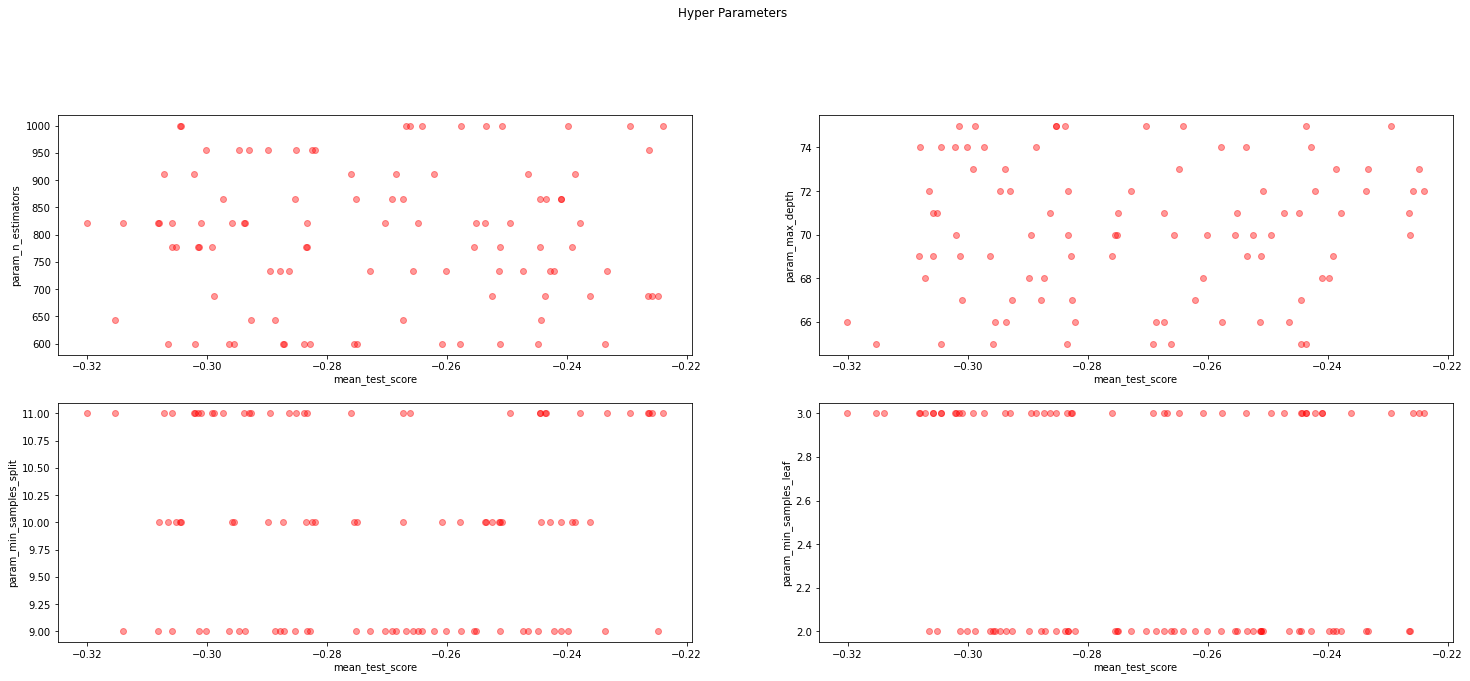

In [37]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

In [38]:
X_test.columns

Index(['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
       'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV', 'ZnOR_2_heatV',
       'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV', 'WO3_2_heatV',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 'ZnOR_1_Age',
       'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age', 'WO3_1_Age', 'WO3_2_Age',
       'sin_month', 'cos_month', 'UV', 'Wind_Speed'],
      dtype='object')

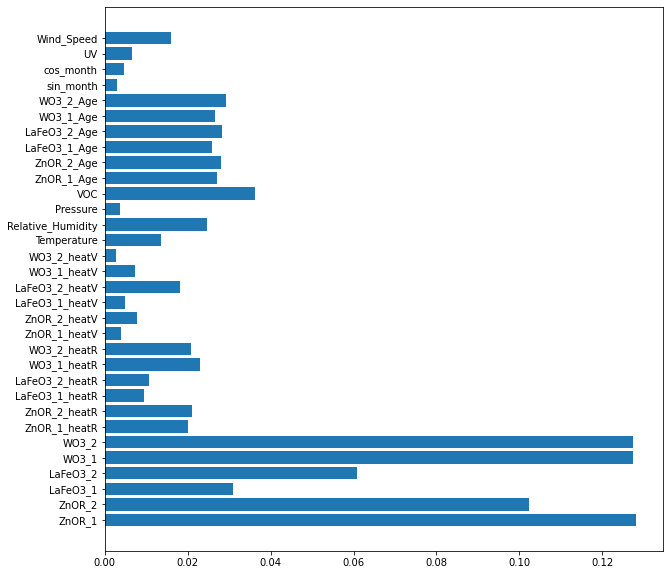

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

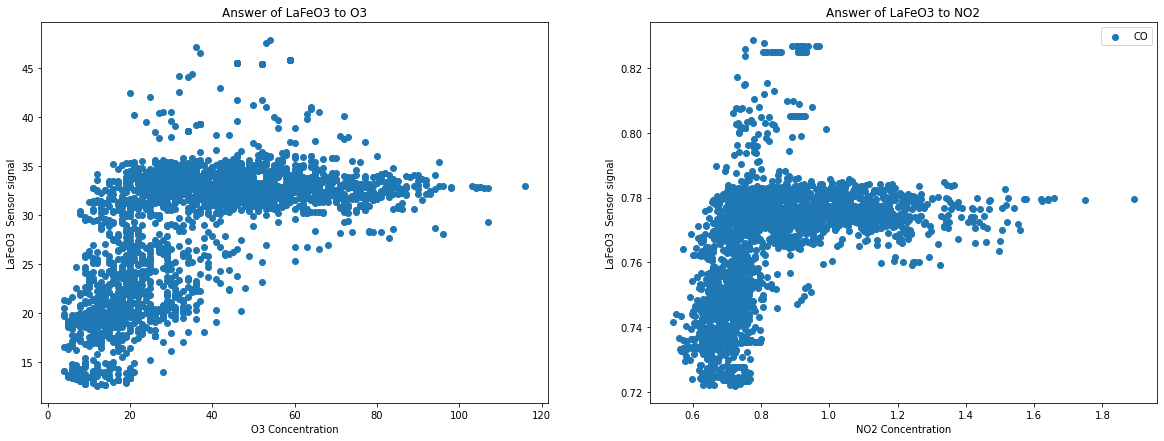

In [50]:
#This is an example of how to perform some data visualization. Take note that plotly is probably way better to do the exact same
#thing but I learned about its existance this morning so I need to make myself accustomed to it.

#For now I will just teach you the basic of to make plots with matplotlib, in general if you have question, ask me or ask google
#The second one knows more things usually 
#You are defining the "Canvas" or the space where you are drawing the plots
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
#Definition of the two plots, notice that you can add a third dimension through the use of the color of the points,
#Again plotly actually seems to do the job in a better way, you can tweak the variable to see if you can notice something
ax1.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 0], label = "PM10")
ax2.scatter(Y_test.CO, rf_random.predict(X_test)[:, 2], label = "CO")
# ax1.scatter(Y_test.PM10, rf_random.predict(X_test), label = "PM10")

#Legends, title and title axes of the two graph
ax2.set_title('Answer of LaFeO3 to NO2')
ax2.set_xlabel('NO2 Concentration')
ax2.set_ylabel('LaFeO3  Sensor signal')
ax1.set_title('Answer of LaFeO3 to O3')
ax1.set_xlabel('O3 Concentration')
ax1.set_ylabel('LaFeO3  Sensor signal')
#You can in general: set a limit to each axis, add text, save the figure, use a logaritmic scale either on the X or the Y, just try and see what works or not
#ax2.set_ylim((0,0.2*10**8))
#ax2.text(0.02, 0.86, "$\mathregular{R^2}$ = " + str(round(r_squared,3)) + "  RMS  = "  + str(round(rms,3))+ " ppb", transform=ax2.transAxes, fontsize=14,verticalalignment='top', bbox=props)
ax2.legend()
#plt.savefig('PM10allRPredict.png', dpi=600, bbox_inches='tight')
plt.show()